In [2]:
import pandas as pd
import numpy as np
import keras
import cv2
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras import optimizers
from keras import backend as K
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [78]:
import tensorflow as tf

In [8]:
train = pd.read_csv("C:/Users/tuana/Downloads/archive/sign_mnist_train.csv")
test = pd.read_csv("C:/Users/tuana/Downloads/archive/sign_mnist_test.csv")

In [9]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [10]:
y_train_label = train.iloc[:,0]# lấy tất cả các hàng trong cột 0 
y_test_label = test.iloc[:,0]

In [11]:
train = train.iloc[:,1:]# lấy tất cả các hàng từ cột 1 đến hết 
test = test.iloc[:,1:]

In [51]:
train_x = train.values
test_x = test.values
train_x

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]], dtype=int64)

In [56]:
im = train_x[:1]

In [57]:
im.shape

(1, 784)

In [74]:
type(im)

numpy.ndarray

In [62]:
import numpy as np
im_np = np.asarray(im, dtype=float)

In [63]:
im_new = im_np.reshape((28,28))# resconstruct image to build the image again instead of the table

In [64]:
im_new.shape

(28, 28)

In [66]:
import cv2

In [72]:
cv2.imwrite(f"C:/Users/tuana/Downloads/archive/sign_mnist_train/im.jpg", im_new)

True

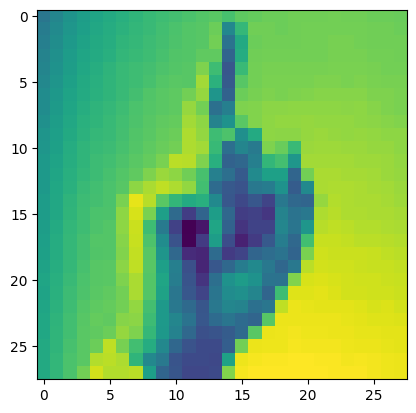

In [65]:
import matplotlib.pyplot as plt
plt.imshow(im_new)


In [29]:
train_x.shape

(27455, 784)

In [30]:
train_x = train_x - np.mean(train_x) / train_x.std()
test_x = test_x - np.mean(test_x) / train_x.std()

In [31]:
train_x = train_x.reshape(-1,28,28,1)
test_x = test_x.reshape(-1,28,28,1)

In [32]:
train_x[0].shape

(28, 28, 1)

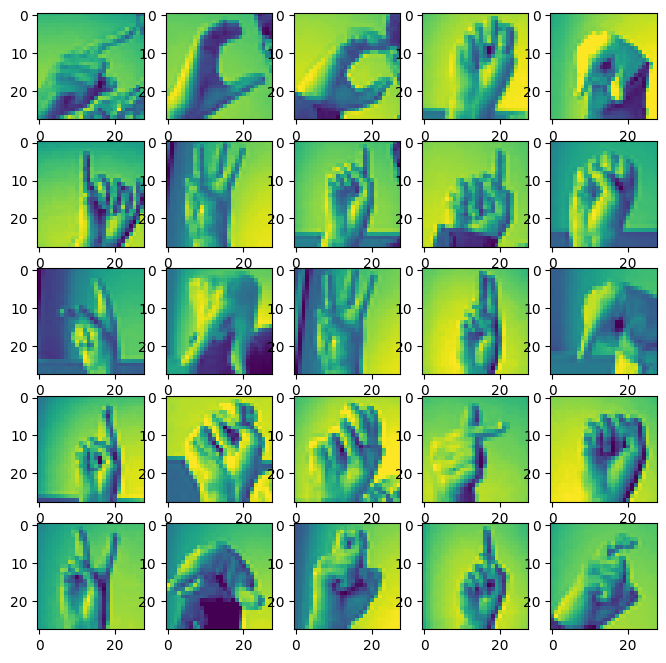

In [33]:
w=10
h=10
fig=plt.figure(figsize=(8,8))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    img = train_x[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(np.squeeze(img))
plt.show()

In [34]:
LB = LabelBinarizer()
y_train_label = LB.fit_transform(y_train_label)
y_test_label = LB.fit_transform(y_test_label)
y_train_label.shape

(27455, 24)

In [35]:
xtrain,xval,ytrain,yval=train_test_split(train_x, y_train_label,train_size=0.75,random_state=0)

In [45]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,    
        rotation_range=15,    
        width_shift_range=0.1,
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=False)

In [46]:
datagen.fit(xtrain)

In [47]:
model = Sequential()
 
model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(24, activation='softmax'))

In [76]:
model

In [80]:
learning_rate = 1e-3
lr_decay = 1e-6
#sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

In [81]:
print(xtrain.shape, xval.shape)

(20591, 28, 28, 1) (6864, 28, 28, 1)


In [ ]:
history = model.fit_generator(datagen.flow(xtrain, ytrain, batch_size=32),
                    steps_per_epoch=xtrain.shape[0]//32,
                    epochs=200,
                    verbose=1,
                    validation_data=(xval, yval))

Epoch 1/200
643/643 [==============================] - 34s 52ms/step - loss: 3.1977 - accuracy: 0.0789 - val_loss: 2.7044 - val_accuracy: 0.2485
Epoch 2/200
261/643 [===========>..................] - ETA: 17s - loss: 2.8687 - accuracy: 0.1340

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [44]:
score = model.evaluate(test_x, y_test_label, verbose=0)
print("Loss: " + str(score[0]))
print("Accuracy: " + str(score[1]*100) + "%")

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.